In [1]:
import os
import numpy as np
import pynbody
from pynbody.plot import sph
import matplotlib.pylab as plt

from snap_io import load_moria_sim_and_kicked, load_moria, load_kicked, load_sim

In [2]:
SIMNUMBER = "69002_p200.0_a600.0_r600.0_c8.15"
kicked=True

In [3]:
resolution = 500
width = 10 # kpc
vmax=2e-1
vmin=5e-4;

In [4]:
snap_list = load_kicked(SIMNUMBER) if kicked else load_moria(SIMNUMBER)

In [5]:
s = snap_list[0]

In [6]:
# # pynbody.analysis.angmom.faceon(sim)

In [7]:
# fig, ax = plt.subplots(figsize=(10,10))
# sph.image(sim.g, subplot=ax, qty="rho", resolution=500, units="g cm^-3",
#           width=10, log=False);
# time = '$t={%5.2f}$ Gyr' % sim.properties['time'].in_units("Gyr")
# ax.set_title(time, fontsize=12)

In [72]:
def gas_orthogonal_projection(sim, qty='rho', **kwargs):
    sim.properties.pop('boxsize', None)
    sim.g['smooth'] /= 2
    pynbody.analysis.halo.center(sim, shrink_factor=0.9)
    fig, ((ax_xy, ax_zy), (ax_xz, ax_angmom)) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
    kwargs['ret_im']=True
    if "units" not in kwargs:
        kwargs['units'] = "g cm^-2"
    u_st = sim['pos'].units.latex()
    backup = sim['pos'].copy()
    try:
        im = sph.image(sim.g, subplot=ax_xy, **kwargs)
        ax_xy.set_xlabel("$x/%s$" % u_st)
        ax_xy.set_ylabel("$y/%s$" % u_st)
        
        x=sim['pos'][:,0].copy()
        sim['pos'][:,0] = sim['pos'][:,2].copy()
        sph.image(sim.g, subplot=ax_zy, **kwargs)
        ax_zy.set_xlabel("$z/%s$" % u_st)
        ax_zy.set_ylabel("$y/%s$" % u_st)

        sim['pos'][:,1] = sim['pos'][:,2]
        sim['pos'][:,0] = x
        sph.image(sim.g, subplot=ax_xz, **kwargs)
        ax_xz.set_xlabel("$x/%s$" % u_st)
        ax_xz.set_ylabel("$z/%s$" % u_st)

        pynbody.analysis.angmom.faceon(sim)
        sim['pos'] = backup
        sph.image(sim.g, subplot=ax_angmom, **kwargs)
        ax_angmom.set_xlabel("$x/%s$" % u_st)
        ax_angmom.set_ylabel("$y/%s$" % u_st)
        ax_angmom.set_title("angular momentum faceon")

        fig.subplots_adjust(top=0.9)
        cbar_ax = fig.add_axes([0.2,  0.05, 0.6, 0.02])
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal').set_label(qty+"/"+kwargs['units'])
        
        snap = int(sim.filename[-4:])
        title = '$t={:5.2f}$ Gyr, snap={}'.format(sim.properties['time'].in_units("Gyr"), snap)
        fig.suptitle(title)
    finally:
        sim.g['smooth'] *= 2
        sim['pos'] = backup
    return fig

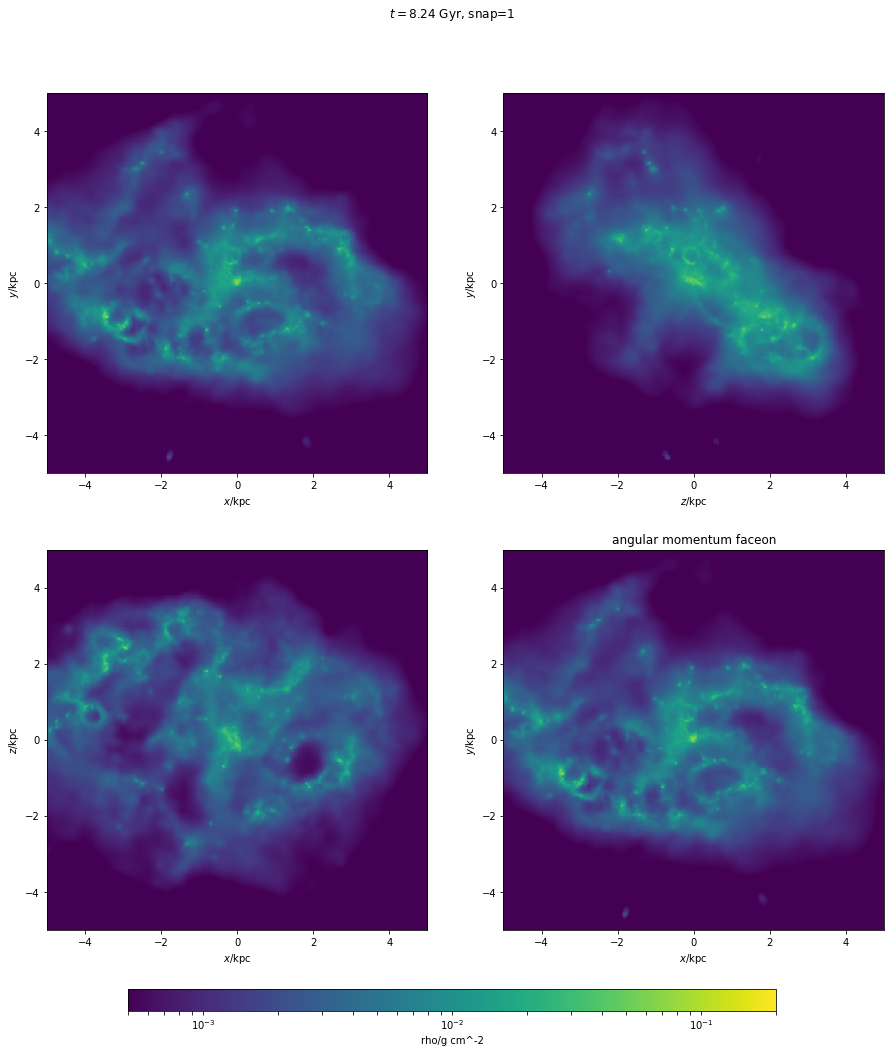

In [73]:
gas_orthogonal_projection(s, width=10, vmin=vmin, vmax=vmax, resolution=resolution);

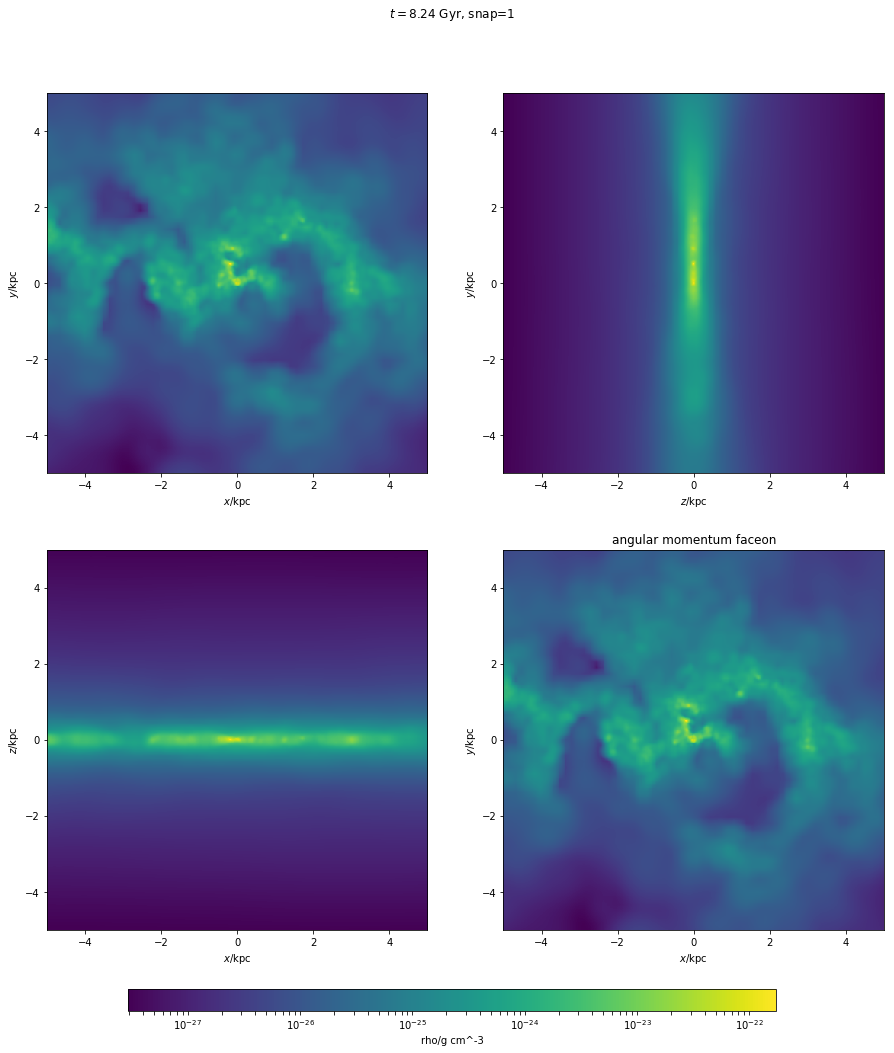

In [76]:
# gas_orthogonal_projection(s, width=10, units="g cm^-3", resolution=resolution);

In [ ]:
# folder = "pngs_{}".format(SIMNUMBER)
# os.makedirs(folder,exist_ok=True )

In [ ]:
# for sim in snap_list[0:3]:
#     snap = int(sim.filename[-4:])
#     fig, ax = plt.subplots(figsize=(15,15))
#     filename = os.path.join(folder,"gas_image_{}_{}.png".format(SIMNUMBER,snap))
#     title = '$t={:5.2f}$ Gyr, snap={}'.format(sim.properties['time'].in_units("Gyr"), snap)
#     gas_image(sim, width=width, vmin=vmin, vmax=vmax, resolution=resolution, title=title, filename=filename);
#     print("Saved", filename)